In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#From
#https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey
sdss=pd.read_csv('/Users/Nico/Documents/AI Seminar/aiphysics/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
## Convert class column to integer
sdss["class"]=np.where(sdss["class"]=='QSO','2',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='STAR','0',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='GALAXY','1',sdss["class"])#.astype(int)
sdssc=sdss.astype({'class':int})

#Filter out anything that is not a star
starsOnly = sdssc[sdssc["class"]==0]
starsOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4152 entries, 0 to 9997
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      4152 non-null   float64
 1   ra         4152 non-null   float64
 2   dec        4152 non-null   float64
 3   u          4152 non-null   float64
 4   g          4152 non-null   float64
 5   r          4152 non-null   float64
 6   i          4152 non-null   float64
 7   z          4152 non-null   float64
 8   run        4152 non-null   int64  
 9   rerun      4152 non-null   int64  
 10  camcol     4152 non-null   int64  
 11  field      4152 non-null   int64  
 12  specobjid  4152 non-null   float64
 13  class      4152 non-null   int32  
 14  redshift   4152 non-null   float64
 15  plate      4152 non-null   int64  
 16  mjd        4152 non-null   int64  
 17  fiberid    4152 non-null   int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 600.1 KB


In [5]:
starsOnly.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,4.152000e+03,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.0,4152.000000,4152.000000,4.152000e+03,4152.0,4152.000000,4152.000000,4152.000000,4152.000000
mean,1.237650e+18,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,950.886561,301.0,3.632225,303.552264,3.018202e+18,0.0,0.000043,2680.613198,54093.892823,362.838391
std,9.165904e+04,48.998648,23.756274,0.929816,0.988460,1.080897,1.152151,1.171915,268.178008,0.0,1.647977,158.708037,2.132595e+18,0.0,0.000410,1894.109205,1475.534114,225.632919
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.482380,13.247230,12.607180,308.000000,301.0,1.000000,11.000000,2.995850e+17,0.0,-0.004136,266.000000,51608.000000,1.000000
25%,1.237650e+18,161.105799,-0.533353,17.707375,16.459987,15.987657,15.813655,15.723000,752.000000,301.0,2.000000,207.000000,1.040458e+18,0.0,-0.000133,924.000000,53003.000000,179.000000
50%,1.237650e+18,182.280508,0.285323,18.500935,17.237445,16.788435,16.621145,16.548885,756.000000,301.0,4.000000,303.000000,3.211180e+18,0.0,0.000024,2852.000000,54471.000000,351.000000
75%,1.237650e+18,199.206098,13.189393,19.105045,17.901390,17.520347,17.396130,17.333417,1302.000000,301.0,5.000000,412.000000,3.640140e+18,0.0,0.000218,3233.000000,54891.000000,526.250000
max,1.237650e+18,260.884382,68.532007,19.599340,19.918970,24.802030,28.179630,20.796100,1412.000000,301.0,6.000000,768.000000,9.468830e+18,0.0,0.004563,8410.000000,57481.000000,1000.000000


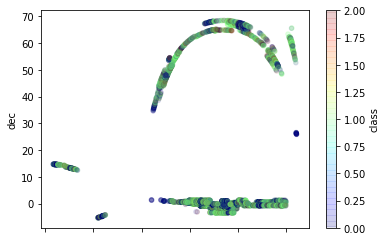

In [6]:
#Visualize the data, with stars and galaxies and qso
sdssc.plot(kind="scatter",x="ra",y="dec",c="class",alpha=0.1,cmap=plt.get_cmap("jet"),colorbar=True)

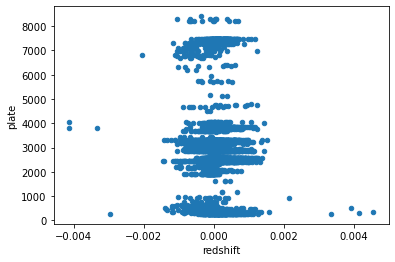

In [7]:
starsOnly.plot(kind="scatter",x='redshift',y='plate')
#This is going to cause problems, because there are really weird, nonlinear correlations that will mess things up

(3300, 18)
(3300,)


(array([  2.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   4.,  12.,  24.,  56.,  90., 153.,
        383., 955., 758., 355., 205., 151.,  69.,  47.,  20.,   7.,   3.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([-4.13607800e-03, -3.96209276e-03, -3.78810752e-03, -3.61412228e-03,
        -3.44013704e-03, -3.26615180e-03, -3.09216656e-03, -2.91818132e-03,
        -2.74419608e-03, -2.57021084e-03, -2.39622560e-03, -2.22224036e-03,
        -2.04825512e-03, -1.87426988e-03, -1.70028464e-03, -1.52629940e-03,
        -1.35231416e-03, -1.17832892e-03, -1.00434368e-03, -8.30358440e-04,
        -6.56373200e-04, -4.82387960e-04, -3.08402720e-04, -1.34417480e-04,
         3.95677600e-05,  2.13553000e-04,  3.87538240e-04,  5.61523480e-04,
         7.35508720e-04,  9.09493960e-04,  1.08347920e-03,  1.25746444e-03,
         1.43144968e-03,  1.60543492e-03,  1.77942

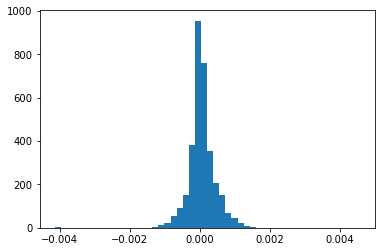

In [8]:
#Get a training set for the stars
X_train_full=starsOnly[:3300] #80% of the amount of star data is ~3300
y_train_label=X_train_full["redshift"]
print(X_train_full.shape)
print(y_train_label.shape)
# Look at correlations
corr_matrix=X_train_full.corr()
corr_matrix["redshift"].sort_values(ascending=False)
#corr_matrix["class"].sort_values(ascending=False)
plt.hist(y_train_label,bins=50)

In [9]:
#Interesting how Gaussian the graph looks even with all of the features

#Drop the non important features, keep the magnitudes and z
X_train=X_train_full.drop(columns=["mjd","redshift","plate","fiberid","specobjid","field","camcol","run","rerun","objid","ra","dec"],axis=1)#,inplace=True)
print(X_train)
print(X_train_full.shape,X_train.shape)

             u         g         r         i         z  class
0     19.47406  17.04240  15.94699  15.50342  15.22531      0
1     18.66280  17.21449  16.67637  16.48922  16.39150      0
3     17.76536  16.60272  16.16116  15.98233  15.90438      0
4     17.55025  16.26342  16.43869  16.55492  16.61326      0
5     19.43133  18.46779  18.16451  18.01475  18.04155      0
...        ...       ...       ...       ...       ...    ...
8012  19.50190  19.25799  19.57236  19.81910  20.06964      0
8014  18.14431  17.06523  16.69869  16.57107  16.53969      0
8015  18.46614  16.88119  16.31281  16.10311  16.01222      0
8016  18.33848  16.19855  15.46038  15.21337  15.11296      0
8017  16.76711  15.19297  14.59694  14.35180  14.25430      0

[3300 rows x 6 columns]
(3300, 18) (3300, 6)


Score= 0.0011344032853576325


'The coefficient R^2 is defined as (1-u/v), where u is the residual \nsum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum \nof squares ((y_true - y_true.mean()) ** 2).sum()'

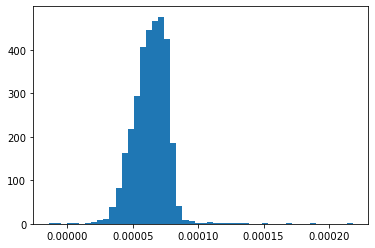

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train_label)
plt.hist(lin_reg.predict(X_train),bins=50)
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
'''The coefficient R^2 is defined as (1-u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum 
of squares ((y_true - y_true.mean()) ** 2).sum()'''


In [11]:
### Clearly, does not work so well. Let's see why.

### Some of its attributes
coeff=result.coef_
print((coeff))
### The problem is the mismatched amplitudes of the features


[-2.20680147e-05  3.90980033e-05  2.78796154e-05 -7.84275638e-06
 -2.77662766e-05  0.00000000e+00]


[-2.20680147e-05  3.90980033e-05  2.78796154e-05 -7.84275638e-06
 -2.77662766e-05  0.00000000e+00]
[5.77667378e-05 6.26207014e-05]
0   -0.000009
1   -0.000055
Name: redshift, dtype: float64
Score= 0.0011344032853576325


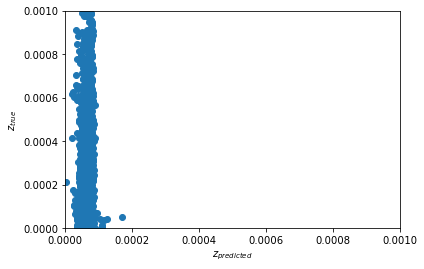

In [12]:
### Do it again this time normalizing:
lin_reg=LinearRegression(normalize=True)
result_norm=lin_reg.fit(X_train,y_train_label)
coeff_norm=result_norm.coef_
print(coeff_norm)
print(lin_reg.predict(X_train[:2]))
#print((X_train_full[:2]))
print(y_train_label[:2])
#plt.hist(lin_reg.predict(X_train_full),bins=50)
plt.scatter(lin_reg.predict(X_train),y_train_label)
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.axis([0,.001,0,.001])
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
#Makes sense that redshift for stars is so low.

In [13]:
### This does better but still not well. 
### Look at the coefficients that are largest here are:
ind=np.argsort(np.abs(coeff_norm))
for i in ind:
    print(X_train.columns[i],coeff_norm[i])
print(X_train.columns)

class 0.0
i -7.842756383518667e-06
u -2.206801472305951e-05
z -2.7766276561463443e-05
r 2.7879615356302692e-05
g 3.9098003313178925e-05
Index(['u', 'g', 'r', 'i', 'z', 'class'], dtype='object')


It makes sense that the colors and the type have relatively large coefficients and the class since stars will have very low redshifts and galaxies and QSO'S will have much larger ones. (It does not make sense to me that plate carries any weight.) Indeed it seems likely that the problem is that the class coefficient is trying to push all the stars to have low z and might even be doing that correctly. Let's see.

In [14]:
# Stars only gave a terrible score, out of curiousity I want to see the same process but with galaxies only

galaxiesOnly = sdssc[sdssc["class"]==1]
galaxiesOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 2 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      4998 non-null   float64
 1   ra         4998 non-null   float64
 2   dec        4998 non-null   float64
 3   u          4998 non-null   float64
 4   g          4998 non-null   float64
 5   r          4998 non-null   float64
 6   i          4998 non-null   float64
 7   z          4998 non-null   float64
 8   run        4998 non-null   int64  
 9   rerun      4998 non-null   int64  
 10  camcol     4998 non-null   int64  
 11  field      4998 non-null   int64  
 12  specobjid  4998 non-null   float64
 13  class      4998 non-null   int32  
 14  redshift   4998 non-null   float64
 15  plate      4998 non-null   int64  
 16  mjd        4998 non-null   int64  
 17  fiberid    4998 non-null   int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 722.4 KB


In [15]:
galaxiesOnly.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.0,4998.000000,4998.000000,4.998000e+03,4998.0,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.237650e+18,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,996.711685,301.0,3.654662,300.963585,5.379141e+17,1.0,0.080325,477.680672,52030.280912,340.108844
std,1.108591e+05,46.777154,25.685596,0.692389,0.757240,0.848500,0.885694,0.947040,273.808945,0.0,1.679786,165.836017,8.107982e+17,0.0,0.046036,720.126177,628.579986,186.852622
min,1.237650e+18,8.291367,-5.378794,14.458560,13.080550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,1.0,-0.000513,266.000000,51578.000000,1.000000
25%,1.237650e+18,155.541880,-0.548706,18.504252,16.977958,16.191585,15.778690,15.459365,756.000000,301.0,2.000000,179.000000,3.198208e+17,1.0,0.051216,284.000000,51871.500000,186.250000
50%,1.237650e+18,178.235210,0.479262,18.988990,17.496555,16.741390,16.349395,16.073810,756.000000,301.0,4.000000,291.000000,3.738095e+17,1.0,0.077330,332.000000,51913.000000,345.000000
75%,1.237650e+18,204.606519,45.238498,19.315660,17.888335,17.272227,16.906570,16.695103,1334.000000,301.0,5.000000,413.000000,5.010928e+17,1.0,0.101164,445.000000,51999.000000,496.000000
max,1.237650e+18,260.559672,68.542265,19.599900,19.682320,24.802040,24.361810,22.833060,1412.000000,301.0,6.000000,764.000000,8.514180e+18,1.0,0.855881,7562.000000,56799.000000,994.000000


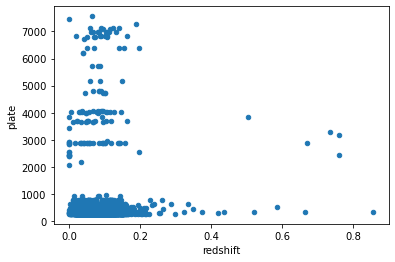

In [16]:
galaxiesOnly.plot(kind="scatter",x='redshift',y='plate')

(4000, 18)
(4000,)


(array([ 83., 340., 582., 616., 831., 613., 415., 256., 134.,  64.,  26.,
         12.,   9.,   3.,   2.,   2.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.13374000e-04,  1.66145195e-02,  3.37424130e-02,  5.08703064e-02,
         6.79981999e-02,  8.51260934e-02,  1.02253987e-01,  1.19381880e-01,
         1.36509774e-01,  1.53637667e-01,  1.70765561e-01,  1.87893454e-01,
         2.05021348e-01,  2.22149241e-01,  2.39277135e-01,  2.56405028e-01,
         2.73532922e-01,  2.90660815e-01,  3.07788709e-01,  3.24916602e-01,
         3.42044496e-01,  3.59172389e-01,  3.76300283e-01,  3.93428176e-01,
         4.10556070e-01,  4.27683963e-01,  4.44811856e-01,  4.61939750e-01,
         4.79067643e-01,  4.96195537e-01,  5.13323430e-01,  5.30451324e-01,
         5.47579217e-01,  5.64707111e-01,  5.81835

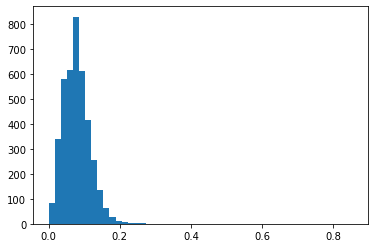

In [17]:
#Get a training set for the galaxies
X_train_full=galaxiesOnly[:4000] #80% of the amount of galaxy data is ~4000
y_train_label=X_train_full["redshift"]
print(X_train_full.shape)
print(y_train_label.shape)
# Look at correlations
corr_matrix=X_train_full.corr()
corr_matrix["redshift"].sort_values(ascending=False)
#corr_matrix["class"].sort_values(ascending=False)
plt.hist(y_train_label,bins=50)

In [18]:
#Drop the non important features, keep the magnitudes and z
X_train=X_train_full.drop(columns=["mjd","redshift","plate","fiberid","specobjid","field","camcol","run","rerun","objid","ra","dec"],axis=1)#,inplace=True)
print(X_train)
print(X_train_full.shape,X_train.shape)

             u         g         r         i         z  class
2     19.38298  18.19169  17.47428  17.08732  16.80125      1
6     19.38322  17.88995  17.10537  16.66393  16.36955      1
9     18.67249  17.71375  17.49362  17.28284  17.22644      1
14    19.25667  17.54869  16.63578  16.14922  15.76639      1
19    17.81661  16.86976  16.53884  16.19576  16.08668      1
...        ...       ...       ...       ...       ...    ...
7847  19.19930  18.27246  17.78881  17.51302  17.33675      1
7866  19.15625  18.08972  17.79720  17.57063  17.48377      1
7867  17.84915  16.64703  16.10961  15.80125  15.58915      1
7872  18.36531  17.11435  16.50102  16.13320  15.88523      1
7874  19.21375  17.61476  16.78795  16.30011  15.92994      1

[4000 rows x 6 columns]
(4000, 18) (4000, 6)


Score= 0.3076160107682727


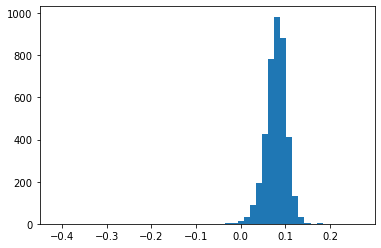

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train_label)
plt.hist(lin_reg.predict(X_train),bins=50)
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train_label)))


[-0.05772611  0.17156335 -0.02238836 -0.05077568 -0.01929299  0.        ]
[0.1153919  0.10169651]
2    0.123111
6    0.100242
Name: redshift, dtype: float64
Score= 0.30761601076827305


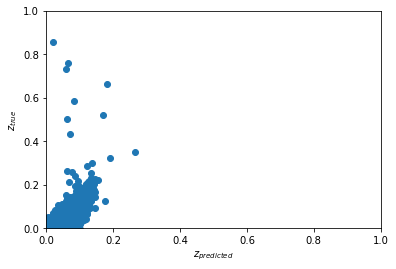

In [20]:
### Do it again this time normalizing:
lin_reg=LinearRegression(normalize=True)
result_norm=lin_reg.fit(X_train,y_train_label)
coeff_norm=result_norm.coef_
print(coeff_norm)
print(lin_reg.predict(X_train[:2]))
#print((X_train_full[:2]))
print(y_train_label[:2])
#plt.hist(lin_reg.predict(X_train_full),bins=50)
plt.scatter(lin_reg.predict(X_train),y_train_label)
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.axis([0,1,0,1])
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
#

In [21]:
# The score was much better than the starsOnly 

### Look at the coefficients that are largest here are:
ind=np.argsort(np.abs(coeff_norm))
for i in ind:
    print(X_train.columns[i],coeff_norm[i])
print(X_train.columns)

class 0.0
z -0.01929298794835873
r -0.02238835775548209
i -0.050775679709575985
u -0.05772610964845397
g 0.17156334875473325
Index(['u', 'g', 'r', 'i', 'z', 'class'], dtype='object')


Finally try it on QSOs

In [22]:
#Filter out anything that is not a star
qsoOnly = sdssc[sdssc["class"]==2]
qsoOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 15 to 9979
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      850 non-null    float64
 1   ra         850 non-null    float64
 2   dec        850 non-null    float64
 3   u          850 non-null    float64
 4   g          850 non-null    float64
 5   r          850 non-null    float64
 6   i          850 non-null    float64
 7   z          850 non-null    float64
 8   run        850 non-null    int64  
 9   rerun      850 non-null    int64  
 10  camcol     850 non-null    int64  
 11  field      850 non-null    int64  
 12  specobjid  850 non-null    float64
 13  class      850 non-null    int32  
 14  redshift   850 non-null    float64
 15  plate      850 non-null    int64  
 16  mjd        850 non-null    int64  
 17  fiberid    850 non-null    int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 122.9 KB


In [23]:
qsoOnly.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,8.500000e+02,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,850.000000,850.000000,8.500000e+02,850.0,850.000000,850.000000,850.000000,850.000000
mean,1.237650e+18,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,1036.120000,301.0,3.694118,304.983529,1.447231e+18,2.0,1.218366,1285.305882,52694.289412,381.558824
std,2.126051e+04,47.101029,27.932922,0.569208,0.614986,0.673280,0.719977,0.774447,279.092636,0.0,1.675174,162.016001,2.278053e+18,0.0,0.697699,2023.299687,1574.906321,211.082659
min,1.237650e+18,9.838536,-5.319284,15.928460,15.758340,15.359820,14.818070,14.515940,727.000000,301.0,1.000000,13.000000,2.995980e+17,2.0,0.000461,266.000000,51608.000000,5.000000
25%,1.237650e+18,155.494332,-0.531296,18.712000,18.406470,18.188030,18.050822,17.930032,756.000000,301.0,2.000000,180.500000,3.311365e+17,2.0,0.651192,294.000000,51900.000000,215.000000
50%,1.237650e+18,181.134116,0.657986,19.088800,18.822220,18.659365,18.529880,18.457200,1035.000000,301.0,4.000000,298.500000,4.132875e+17,2.0,1.234131,367.000000,51986.000000,386.500000
75%,1.237650e+18,206.302080,53.336887,19.359895,19.119875,18.963767,18.848378,18.800670,1345.000000,301.0,5.000000,418.750000,6.813185e+17,2.0,1.744641,605.000000,52366.500000,532.000000
max,1.237650e+18,258.867602,68.540567,19.599750,19.738690,19.874080,20.011050,20.444290,1412.000000,301.0,6.000000,710.000000,9.319320e+18,2.0,5.353854,8277.000000,57391.000000,980.000000


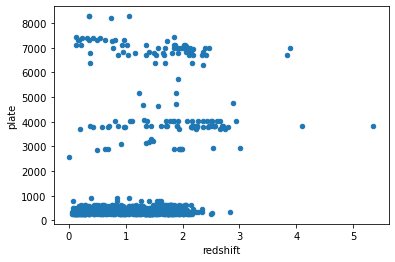

In [24]:
qsoOnly.plot(kind="scatter",x='redshift',y='plate')

(680, 18)
(680,)


(array([13., 35., 39., 31., 24., 22., 31., 25., 34., 27., 34., 35., 42.,
        32., 36., 38., 39., 37., 30., 24., 17., 10.,  3., 10.,  3.,  2.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.60623000e-04, 1.07528491e-01, 2.14596358e-01, 3.21664226e-01,
        4.28732093e-01, 5.35799961e-01, 6.42867828e-01, 7.49935696e-01,
        8.57003563e-01, 9.64071431e-01, 1.07113930e+00, 1.17820717e+00,
        1.28527503e+00, 1.39234290e+00, 1.49941077e+00, 1.60647864e+00,
        1.71354650e+00, 1.82061437e+00, 1.92768224e+00, 2.03475011e+00,
        2.14181797e+00, 2.24888584e+00, 2.35595371e+00, 2.46302158e+00,
        2.57008944e+00, 2.67715731e+00, 2.78422518e+00, 2.89129305e+00,
        2.99836091e+00, 3.10542878e+00, 3.21249665e+00, 3.31956452e+00,
        3.42663238e+00, 3.53370025e+00, 3.64076812e+00, 3.74783599e+00,
        3.85490385e+00, 3.96197172e+00, 4.06903959e+00, 4.17610746e+

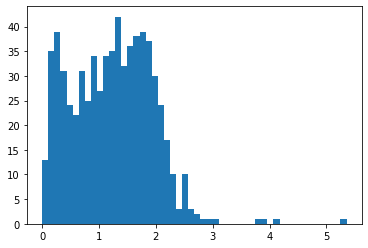

In [26]:
#Get a training set for the qso's
X_train_full=qsoOnly[:680] #80% of the amount of qso data is 680
y_train_label=X_train_full["redshift"]
print(X_train_full.shape)
print(y_train_label.shape)
# Look at correlations
corr_matrix=X_train_full.corr()
corr_matrix["redshift"].sort_values(ascending=False)
#corr_matrix["class"].sort_values(ascending=False)
plt.hist(y_train_label,bins=50)

In [27]:
#Drop the non important features, keep the magnitudes and z
X_train=X_train_full.drop(columns=["mjd","redshift","plate","fiberid","specobjid","field","camcol","run","rerun","objid","ra","dec"],axis=1)#,inplace=True)
print(X_train)
print(X_train_full.shape,X_train.shape)

             u         g         r         i         z  class
15    18.73832  18.60962  18.39696  18.31174  17.97663      2
17    19.22143  19.30248  19.13823  19.11351  19.23454      2
22    19.07731  18.64518  18.49678  18.52677  18.45765      2
45    17.55001  17.42367  17.35734  17.19343  16.97589      2
62    19.52565  19.29625  18.95885  18.52108  18.57694      2
...        ...       ...       ...       ...       ...    ...
8079  17.83703  17.50361  17.47462  17.35455  17.37213      2
8116  18.51731  18.44126  18.28311  18.35011  18.32104      2
8133  19.25848  18.30828  17.98071  17.94991  17.66827      2
8140  19.10809  19.03490  18.74865  18.62078  18.50881      2
8141  18.29481  18.26686  18.07180  17.99218  18.04465      2

[680 rows x 6 columns]
(680, 18) (680, 6)


Score= 0.21753320583177682


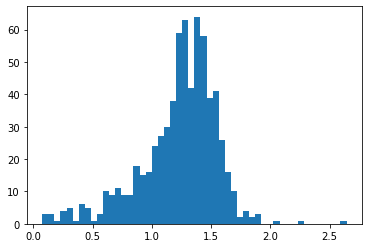

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train_label)
plt.hist(lin_reg.predict(X_train),bins=50)
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train_label)))

In [29]:
### Some of its attributes
coeff=result.coef_
print((coeff))

[ 0.28004819 -1.31863747  1.21417328 -0.73617046  0.77498914  0.        ]


[ 0.28004819 -1.31863747  1.21417328 -0.73617046  0.77498914  0.        ]
[0.95014941 1.45646976]
15    0.271937
17    1.178098
Name: redshift, dtype: float64
Score= 0.21753320583177682


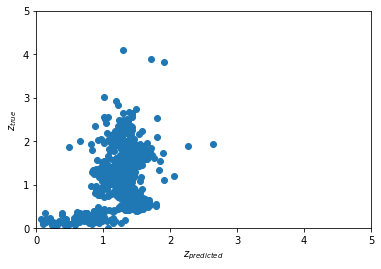

In [31]:
### Do it again this time normalizing:
lin_reg=LinearRegression(normalize=True)
result_norm=lin_reg.fit(X_train,y_train_label)
coeff_norm=result_norm.coef_
print(coeff_norm)
print(lin_reg.predict(X_train[:2]))
#print((X_train_full[:2]))
print(y_train_label[:2])
#plt.hist(lin_reg.predict(X_train_full),bins=50)
plt.scatter(lin_reg.predict(X_train),y_train_label)
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.axis([0,5,0,5])
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
# Still does better than stars, but not as good as galaxies. 